**This is the code for the machine learning model**

In order to use this code, your data must be saved as **"TotalTrafo.csv"** in the same folder as this code

In [18]:
#import neccessary tools and the csv file "Housing"
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
%matplotlib inline
data = pd.read_csv("TotalTrafo.csv")

In [19]:
#Look at the data and shape it, so the right format is used and it can be seperated
dir(data)
type(data.Trafo1)

pandas.core.series.Series

In [20]:
# Seperate the data in the target values (Energy usage of Trafo1 and Trafo2) and the features, check if everything is correct
Y = data['Trafo1']

#cyclic decoding of the hours (0-23) to sin and cosine values
data['hour_sin'] = np.sin(2 * np.pi * data['Hour']/23.0)
data['hour_cos'] = np.cos(2 * np.pi * data['Hour']/23.0)

X = data.drop(['Trafo1', 'Trafo2', 'datetime', 'Trafo_Total', 'Month', 'Day', 'Hour'],axis=1)

#check the format and the shape of the data again
print(X)
#print(Y)

      Workday  Min_Temp  Max_Temp  Feels_Like  Pressure  Humidity  Wind Speed  \
0           1     -4.70       2.2       -5.23      1012        97        1.18   
1           1     -5.20       2.7       -4.92      1012        94        1.00   
2           1     -5.70       2.0       -5.48      1012        92        1.00   
3           1     -5.00       1.7       -5.10      1012        93        0.52   
4           1     -4.64       0.0       -5.64      1012        93        1.00   
...       ...       ...       ...         ...       ...       ...         ...   
8755        1     -2.30       8.4       -1.54      1016        41        4.00   
8756        1     -3.00       7.8       -3.70      1017        48        6.00   
8757        1     -2.20       7.1       -0.42      1018        60        2.00   
8758        1     -2.30       6.9       -1.94      1019        53        3.34   
8759        1     -2.50       6.9       -2.17      1020        53        2.98   

          hour_sin  hour_co

In [21]:
data.Trafo1.shape

(8760,)

In [22]:
data['Trafo1']

0       29.31
1       29.06
2       30.40
3       30.02
4       30.91
        ...  
8755    49.54
8756    42.37
8757    40.58
8758    38.14
8759    29.18
Name: Trafo1, Length: 8760, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 65)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [26]:
lr.fit(X_train, Y_train, sample_weight = None)

LinearRegression()

In [27]:
predictions = lr.predict(X_test)
len(predictions)

1752

In [28]:
print(X_test)

      Workday  Min_Temp  Max_Temp  Feels_Like  Pressure  Humidity  Wind Speed  \
5835        0      0.00       5.5       -0.86      1018        89        2.48   
5823        1     -0.10       6.2        0.17      1023        77        2.00   
7382        0     -2.22       4.5       -1.75       997        79        1.00   
8388        0      5.30      18.0        8.14      1009        39        3.00   
4407        1      5.00      13.6        5.50      1036        40        2.00   
...       ...       ...       ...         ...       ...       ...         ...   
6024        0     -4.00      -0.4       -4.92      1021        91        0.61   
1863        1     22.50      30.5       26.60      1008        49        1.00   
6936        1     -5.40       2.5       -7.60      1006        74        5.00   
5478        1      2.70      10.4        4.86      1020        90        1.00   
2713        1     11.20      16.0       13.01      1013       100        1.69   

      hour_sin  hour_cos  


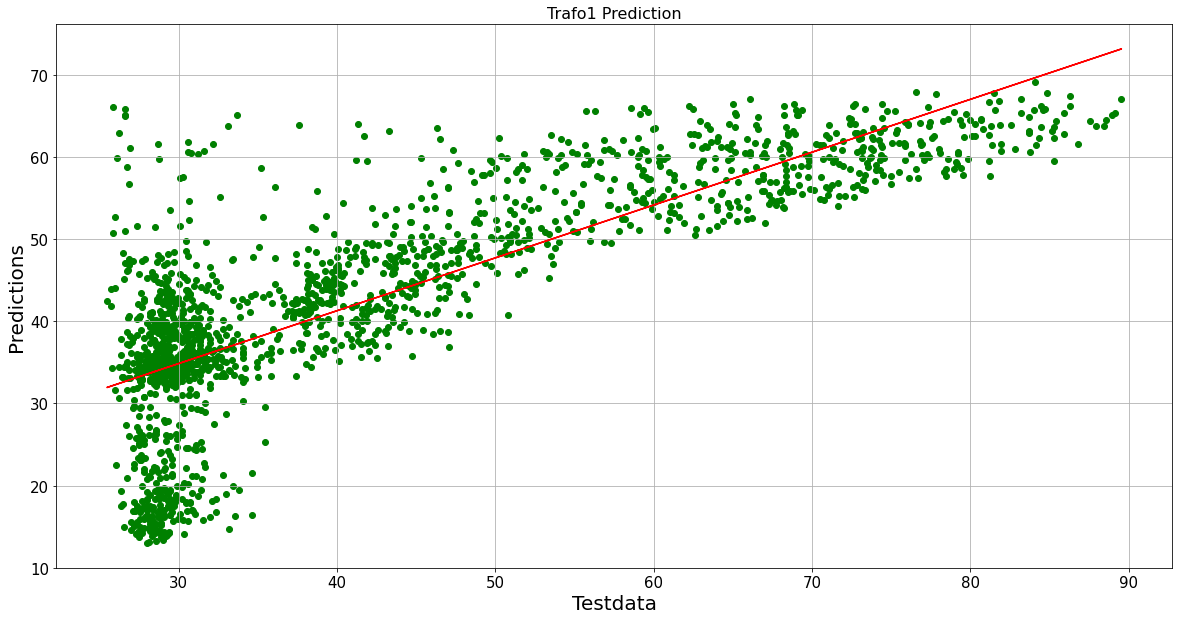

In [29]:
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.scatter(Y_test, predictions, color='green')
plt.title('Trafo1 Prediction', fontname='sans-serif', fontsize=16)
plt.xlabel("Testdata", fontsize=20)
plt.ylabel("Predictions", fontsize=20)
plt.grid(True)

#add a linear polynomial fit line to the plot
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(Y_test, predictions, 1)
plt.plot(Y_test, b + m * Y_test, '-r')

In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
MAE1 = r2_score(Y_test, predictions)
RMSE1 = np.sqrt(mean_squared_error(Y_test, predictions))
RMSE1 = round(RMSE1, 2)
MAE1 = round(MAE1, 4)

In [35]:
txt1 = "The R2 score is {MAE1}".format(MAE1 = MAE1)
txt2 = "With this model we can predict the energy consumption of Trafo 1 on a specific day within the range of \033[1m {RMSE1} kW".format(RMSE1 = RMSE1)

print(txt1)
print(txt2)



The R2 score is 0.6391
With this model we can predict the energy consumption of Trafo 1 on a specific day within the range of  10.1 kW
